#   Practical session on Support Vector Machines (SVM)
( notebook initially created by Judith Abecassis (http://members.cbio.mines-paristech.fr/~jabecassi), Chloé Azencott (http://cazencott.info) and Benoit Playe (http://cbio.ensmp.fr/~bplaye), all 3 from the Center for Computational Biology of MINES ParisTech )

<b>All this notebok is using the simple and very well-known <a href=http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html>"Iris" classification dataset</a>, which contains 150 examples (each with 4 numeric attributes) equally distributed in 3 classes.</b>


In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
# importer les données
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
# afficher la description de la base de données
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
# iris.feature_names[]
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### LINEAR SVM
We first restrict ourselves to two of the three classes: setosa et virginica, and  (for visualization purposes) to only 2 of the 4 features/attributes: sepal length and sepal width. We are going to train a linear SVM, and display the obtained separating hyperplane (a straight line, since we for the moment work in 2D input space). 

We will use the [SVC class](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) from the svm module of scikit-learn. **As usual, you should first browse the documentation (here of SVC class) in order to understand well how SVC works, and what are its hyper-parameters.**

In [5]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1000)

# select the data we want: (2 of the 3 classes, and 2 of the 4 features)
X = iris.data[iris.target!=1, :2]
print(X.shape)
y = iris.target[iris.target!=1]
print(y.shape)
clf.fit(X, y)

(100, 2)
(100,)


SVC(C=1000, kernel='linear')

#### Let's plot the separating hyperplane

[[5.5 3.5]
 [4.5 2.3]
 [4.9 2.5]]


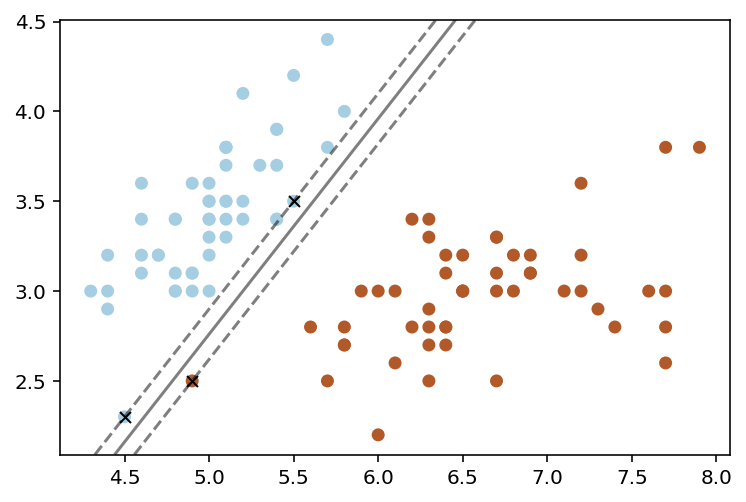

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
#ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
#           linewidth=1, facecolors='none')

ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=30,
           linewidth=1, marker='x', color='k')
print(clf.support_vectors_)

__Question:__ Where are located the support vectors?

__Answer:__ They locate on the boundrays of margin with
$p_1 = [5.5,3.5]$, 
$p_2 = [4.5,2.3]$, 
$p_3 = [4.9,2.5]$

#### Let us evaluate the performance of the learnt predictor

In [7]:
print(clf.score(X, y))

1.0


__Question:__ What is the performance metric computed by `clf.score`? Please refer to the [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.score). What is the meaning if the permormance value is equal to 1.0 ?

__Answer:__ The metric `clf.score` is the accuracy of SVM classifier. The value is 1.0 means that no example is misclassified.

Now, let us consider the *Versicolor* class (instead of Setosa), and still the Virginica class.

In [8]:
clf = svm.SVC(kernel='linear', C=1000)

# select the data we want: (2 of the 3 classes, and 2 of the 4 features)
X = iris.data[iris.target!=0, :2]
print(X.shape)
y = iris.target[iris.target!=0]
print(y.shape)
clf.fit(X, y)

(100, 2)
(100,)


SVC(C=1000, kernel='linear')

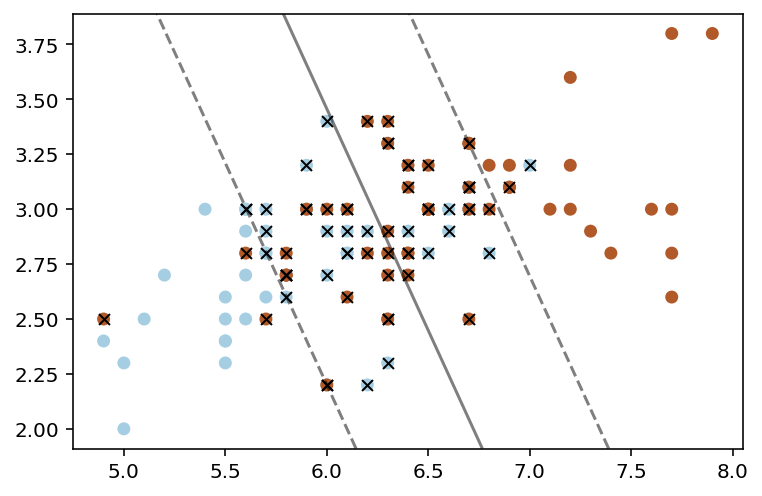

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# plot support vectors
#ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
#           linewidth=1, facecolors='none')

ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=30,
           linewidth=1, marker='x', color='k')

__Question:__ Where are located the support vectors?

__Answer:__ The support vectors locate within the margin or in the wrong class

Now, let us check the performance of the obtained linear SVM on this problem

In [10]:
print(clf.score(X, y))

0.73


The performance is not so good: only ~0.7. We should therefore try to use a NON-LINEAR kernel, in order to obtain a more complex separating boundary that could be better adapted to the data.

### SVM with NON-LINEAR kernel

We will use a Gaussian kernel, but should try different values for the gamma parameter. As seen during the lecture, the Gaussian kernel formula is:  
$k(x, x') = \frac{1}{\sqrt{2 \pi}} \exp\frac{||x - x'||^2}{2 \sigma^2}$. 

__Question:__ What does correspond the gamma parameter of Gaussian SVC correspond to?

__Answer:__ The gamma parameter of Gaussian SVC correspond to $\sigma$ in the formula

In [11]:
# Values to be tested for gamma
gamma_range = np.linspace(0.1, 50, 20)

for param in gamma_range:
    clf = svm.SVC(kernel='rbf', C=0.01, gamma=param)
    clf.fit(X, y)
    print("gamma: %.2f" % param, "score: %.2f" % clf.score(X, y))

gamma: 0.10 score: 0.68
gamma: 2.73 score: 0.73
gamma: 5.35 score: 0.69
gamma: 7.98 score: 0.70
gamma: 10.61 score: 0.71
gamma: 13.23 score: 0.76
gamma: 15.86 score: 0.76
gamma: 18.48 score: 0.76
gamma: 21.11 score: 0.76
gamma: 23.74 score: 0.78
gamma: 26.36 score: 0.78
gamma: 28.99 score: 0.78
gamma: 31.62 score: 0.78
gamma: 34.24 score: 0.79
gamma: 36.87 score: 0.80
gamma: 39.49 score: 0.80
gamma: 42.12 score: 0.80
gamma: 44.75 score: 0.80
gamma: 47.37 score: 0.80
gamma: 50.00 score: 0.80


__Question:__ Now display the separating boundary for the last of these classifiers, which has a score of ~0.8 (therefore a much better model than the linea SVM model).

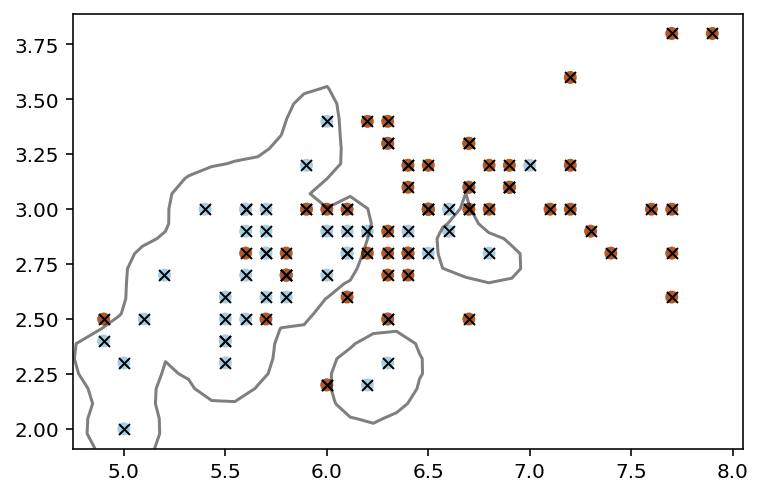

In [12]:
# Answer: 
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# plot support vectors
#ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
#           linewidth=1, facecolors='none')

ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=30,
           linewidth=1, marker='x', color='k')

__Question:__ Which are the support vectors? Do you think the model shall generalize well (and why)?

__Answer:__ All points are support vectors. The model does not generate well because the boudrays are not smooth

In order to check if the model __generalizes__ well, we need to apply it on new data examples that have NOT been used for training the classifier. 

To this end, we will separate the data in two: a __training set__ and a __test set__. We will train our SVMs on only the training set, and measure the performance on only the test set. The test set, because it was not used during training, plays the role of future new data. For the splitting, we shall use the `train_test_split` function of scikit-learn, described [here](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=56)

acc_train, acc_test = list(), list()
for param in np.linspace(0.1, 50, 20):
    clf = svm.SVC(kernel='rbf', C=0.01, gamma=param)
    clf.fit(X_train, y_train)
    acc_train.append(clf.score(X_train, y_train))
    acc_test.append(clf.score(X_test, y_test))

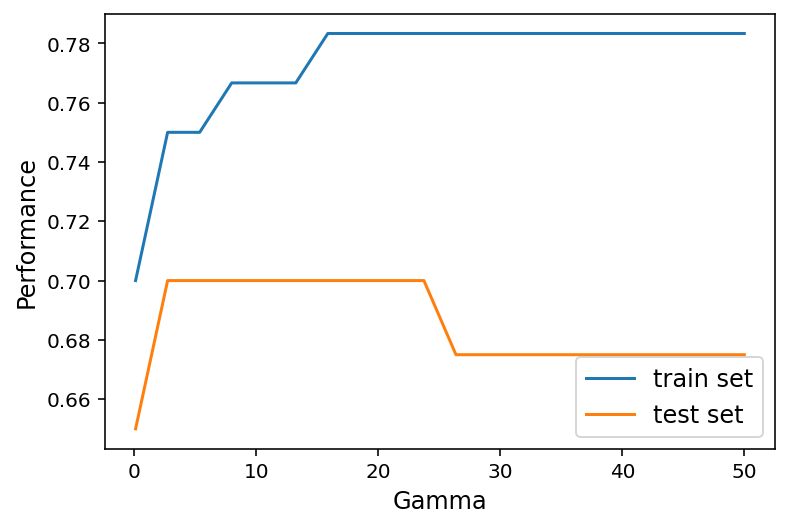

In [14]:
# Plot the traing AND test scores, for each value of gamma hyper-parameter
plt.plot(np.linspace(0.1, 50, 20), acc_train, label='train set')
plt.plot(np.linspace(0.1, 50, 20), acc_test, label='test set')

plt.xlabel("Gamma", fontsize=12)
plt.ylabel("Performance", fontsize=12)

plt.legend(loc='best', fontsize=12)

__Question:__ Do you observe OVER-FITTING? If yes, WHERE? 

__Answer:__  Yes. When `Gamma` is between 20 and 30, the accuracy of the test set dropped a lot, that means the over-fitting occurred.

Given the above graphic, we are tempted to choose a value of 10 or 20 for gamma. But BE CAREFULL! If we select the hyper-parameter value which works best on TEST set, it implies that we will have used information from the test set during training, so the performance estimation on test set might be over-estimated...

In order to avoid this, it is necessary to choose the best gamma value rather by __cross-validation__ applied to the TRAINING set. For this, we shall use the [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) class from the model_selection module of scikit-learn.

In [15]:
from sklearn.model_selection import GridSearchCV

# Define the parameters and values to be tested
parameters = {'kernel':('linear', 'rbf'), 
              'C':[0.1, 1, 10]}

# Initialize a SVM classifier
svc = svm.SVC()

# Initialize the cross-validation
clf = GridSearchCV(svc, parameters)

# Now, run cross-validation on the TRAINING set
clf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ('linear', 'rbf')})

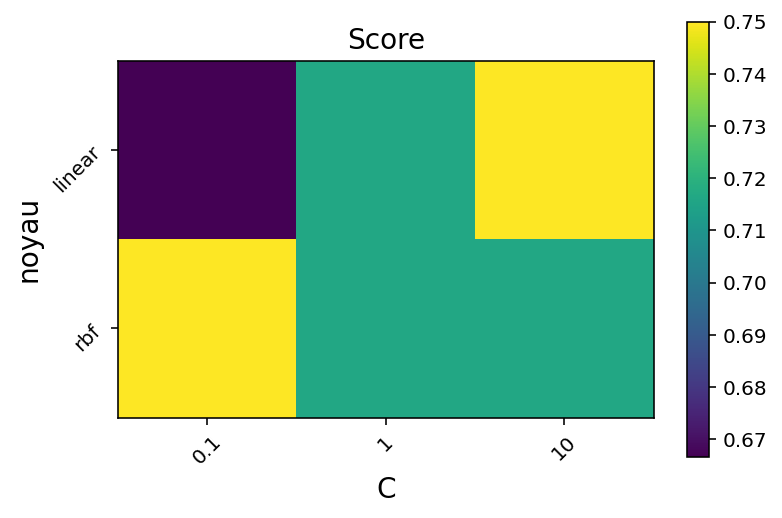

In [16]:
plt.imshow(clf.cv_results_['mean_test_score'].reshape(len(parameters['kernel']), 
                                                      len(parameters['C'])), interpolation='none')

plt.xlabel('C', fontsize=14)
plt.ylabel('noyau', fontsize=14)
plt.title("Score", fontsize=14)

plt.xticks(np.arange(len(parameters['C'])), parameters['C'], rotation=45)
plt.yticks(np.arange(len(parameters['kernel'])), parameters['kernel'], rotation=45)

plt.colorbar()

__Question:__ What is the role of the hyper-parameter C? What do you observe when C is large? 

__Answer:__ C is a regularization parameter which controls the trade-off. When C is larege, the model makes few erros but smaller margin

### Wrap-up: now, write below the codes for finding best SVM hyper-parameters, when using ALL 4 features/attributes:

__Question:__ Train, with CROSS-VALIDATION, a classification SVM to separate classes on the 2 different problems setosa_vs_virginica, then versicolor_vs_virginica. 

What performances obtain your optimal SVMs on the TEST set?

##### 1) Setosa vs virginica

In [17]:
# Answer
X = iris.data[iris.target!=1, :2]
print(X.shape)
y = iris.target[iris.target!=1]
print(y.shape)

(100, 2)
(100,)


In [18]:
parameters = {'kernel':('linear', 'rbf'), 
              'C':[0.01,0.001,0.1, 1, 10, 1000]}

# Initialize a SVM classifier
svc = svm.SVC()

# Initialize the cross-validation
clf = GridSearchCV(svc, parameters, cv = 3, scoring = 'accuracy')

# Now, run cross-validation on the TRAINING set
clf.fit(X, y)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.01, 0.001, 0.1, 1, 10, 1000],
                         'kernel': ('linear', 'rbf')},
             scoring='accuracy')

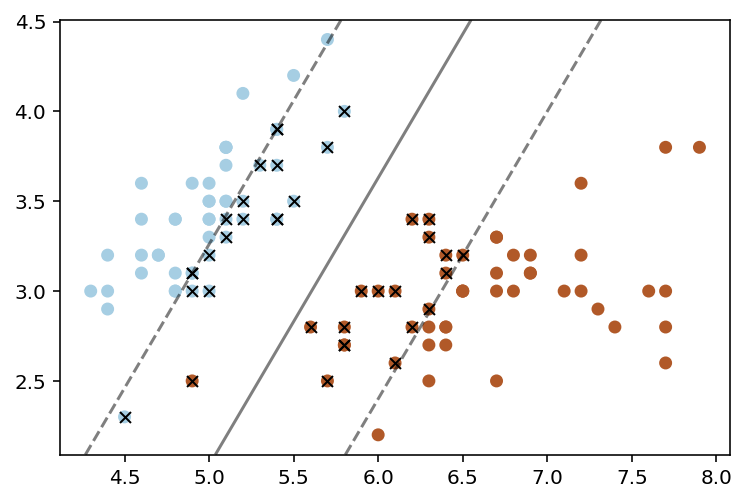

In [19]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# plot support vectors
#ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
#           linewidth=1, facecolors='none')

estimator = clf.best_estimator_
ax.scatter(estimator.support_vectors_[:, 0], estimator.support_vectors_[:, 1], s=30,
           linewidth=1, marker='x', color='k')


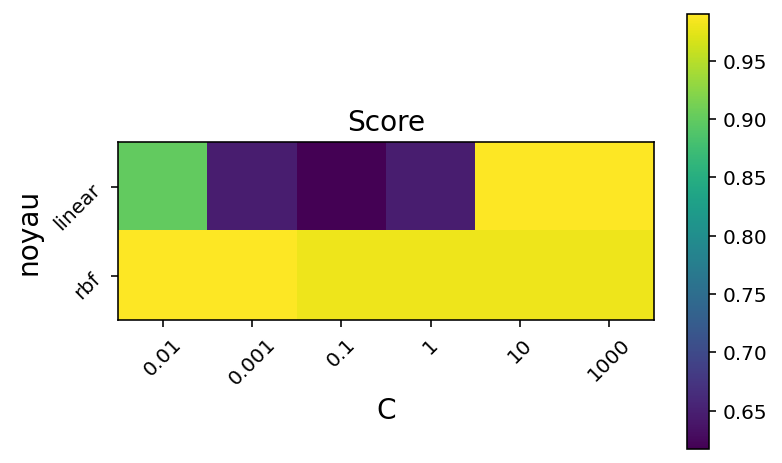

In [20]:
plt.imshow(clf.cv_results_['mean_test_score'].reshape(len(parameters['kernel']), 
                                                      len(parameters['C'])), interpolation='none')

plt.xlabel('C', fontsize=14)
plt.ylabel('noyau', fontsize=14)
plt.title("Score", fontsize=14)

plt.xticks(np.arange(len(parameters['C'])), parameters['C'], rotation=45)
plt.yticks(np.arange(len(parameters['kernel'])), parameters['kernel'], rotation=45)

plt.colorbar()

##### 2) Versicolour et Virginica

In [21]:
# Answer
X = iris.data[iris.target!=0, :2]
print(X.shape)
y = iris.target[iris.target!=0]
print(y.shape)
parameters = {'kernel':('linear', 'rbf'), 
              'C':[0.1, 1, 10]}

# Initialize a SVM classifier
svc = svm.SVC()

# Initialize the cross-validation
clf = GridSearchCV(svc, parameters, cv = 3, scoring = 'accuracy')

# Now, run cross-validation on the TRAINING set
clf.fit(X, y)

(100, 2)
(100,)


GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ('linear', 'rbf')},
             scoring='accuracy')

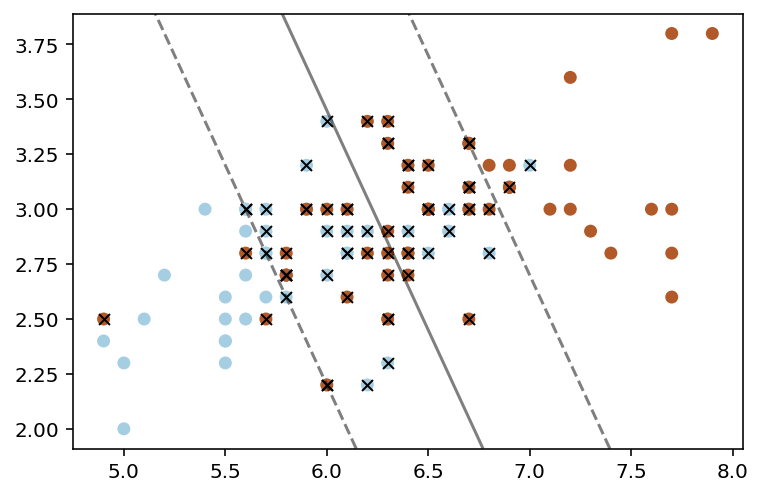

In [22]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# plot support vectors
#ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
#           linewidth=1, facecolors='none')

estimator = clf.best_estimator_
ax.scatter(estimator.support_vectors_[:, 0], estimator.support_vectors_[:, 1], s=30,
           linewidth=1, marker='x', color='k')


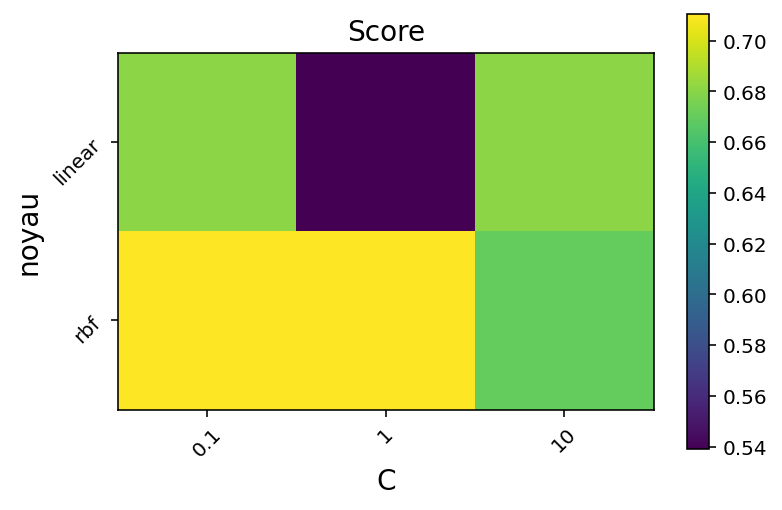

In [23]:
plt.imshow(clf.cv_results_['mean_test_score'].reshape(len(parameters['kernel']), 
                                                      len(parameters['C'])), interpolation='none')

plt.xlabel('C', fontsize=14)
plt.ylabel('noyau', fontsize=14)
plt.title("Score", fontsize=14)

plt.xticks(np.arange(len(parameters['C'])), parameters['C'], rotation=45)
plt.yticks(np.arange(len(parameters['kernel'])), parameters['kernel'], rotation=45)

plt.colorbar()

__Question: Look into SVC documentation, and explain how it handles MULTI-CLASS problems. *How many different SVMs does SVC learn and combine if there is a total of K classes*?__ 

__Answer:__ Everytime, it divide the dataset into two parts, one part in one of the classes, the other part is all other classes, and solve the problem of two-class classification, for K classes, it learns k SVMs


### Assignment #1:  1/ Find (using gridSearch) the best possible SVM (with any kernel type among linear, polynomial or Gaussian) for the COMPLETE dataset (all 3 classes). 2/ For the best SVM model found, compute and display the CONFUSION MATRIX + compute and plot the PRECISION-RECALL CURVES FOR EACH CLASS

NB: for the second question, SEARCH BY YOURSELF INTO THE SciKit-Learn documentation in order to find the corresponding pre-programmed functions.



In [44]:
X = iris.data[:, :2]
print(X.shape)
y = iris.target
print(y.shape)
parameters = {'kernel':('linear', 'rbf'), 
              'C':[0.1, 1, 10,100,1000]}

# Initialize a SVM classifier
svc = svm.SVC(decision_function_shape='ovo')

# Initialize the cross-validation
clf = GridSearchCV(svc, parameters, cv = 3, scoring = 'accuracy')

# Now, run cross-validation on the TRAINING set
model = clf.fit(X, y)

(150, 2)
(150,)


AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xlim'

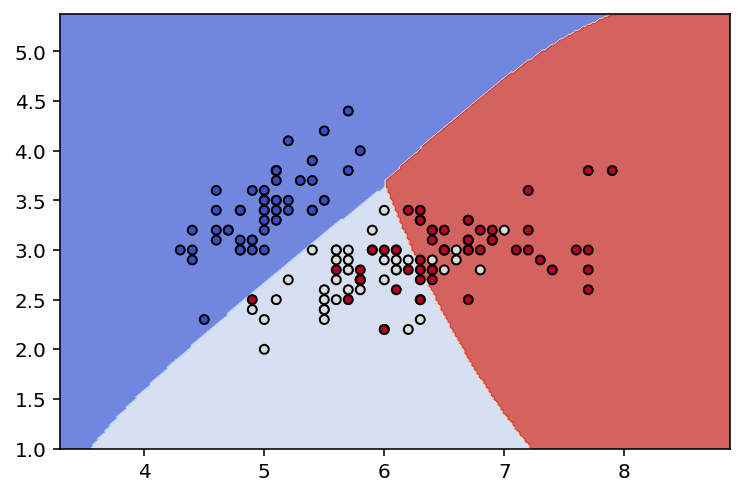

In [56]:
def make_meshgrid(x, y, h=.02):

    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out

estimator = clf.best_estimator_

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, estimator, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')


plt.show()

[[50  0  0]
 [ 0 38 12]
 [ 0 15 35]]


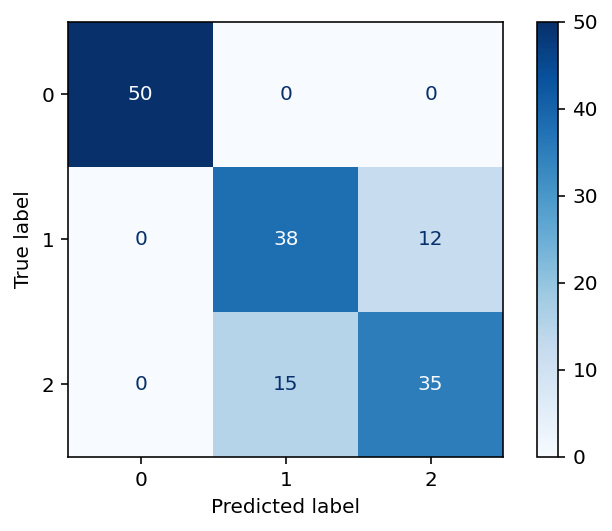

In [61]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
y_true = y
y_pred = estimator.predict(X)
labels = list(set(y_true))
conf_mat = confusion_matrix(list(y_true), list(y_pred), labels = labels)
confusion_matrix(y_true, y_pred)
disp = plot_confusion_matrix(clf, X, y,
                                 display_labels=estimator.classes_,
                                 cmap=plt.cm.Blues)
print(disp.confusion_matrix)
plt.show()

# Final assignment on SVM 

**Now, use SVM to learn digit recognition on the [*Digits dataset*](http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html#sphx-glr-auto-examples-datasets-plot-digits-last-image-py)" (the same that was used at the end of the MLP practical session)**

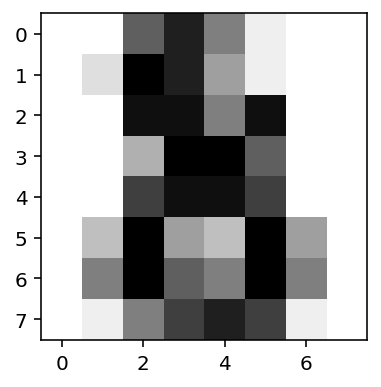

In [63]:
from sklearn import datasets
import matplotlib.pyplot as plt

#Load the digits dataset
digits = datasets.load_digits()

#Display the first digit
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()



In [67]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
Xdigits = data
y_digits = digits.target
parameters = {'kernel':('linear', 'rbf'), 
              'C':[0.1, 1, 10,100,1000],
              'gamma':[0.1,0.3,0.7,1]}

# Initialize a SVM classifier
svc = svm.SVC(decision_function_shape='ovo')
clf = GridSearchCV(svc, parameters, cv = 3, scoring = 'accuracy')

# Now, run cross-validation on the TRAINING set
clf.fit(Xdigits, y_digits)

GridSearchCV(cv=3, estimator=SVC(decision_function_shape='ovo'),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.1, 0.3, 0.7, 1],
                         'kernel': ('linear', 'rbf')},
             scoring='accuracy')

In [76]:
np.size(Xdigits)

115008

1797
1797
[[178   0   0   0   0   0   0   0   0   0]
 [  0 182   0   0   0   0   0   0   0   0]
 [  0   0 177   0   0   0   0   0   0   0]
 [  0   0   0 183   0   0   0   0   0   0]
 [  0   0   0   0 181   0   0   0   0   0]
 [  0   0   0   0   0 182   0   0   0   0]
 [  0   0   0   0   0   0 181   0   0   0]
 [  0   0   0   0   0   0   0 179   0   0]
 [  0   0   0   0   0   0   0   0 174   0]
 [  0   0   0   0   0   0   0   0   0 180]]


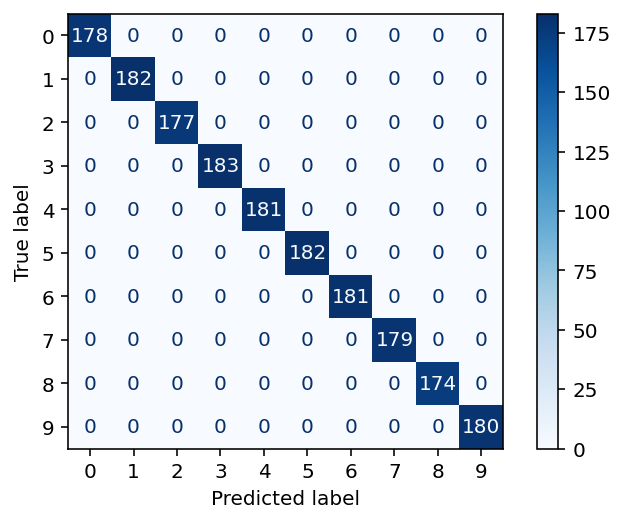

In [83]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
y_true = y_digits
print(np.size(y_true))
y_pred = estimator.predict(Xdigits)
print(np.size(y_pred))
labels = list(set(y_true))
conf_mat = confusion_matrix(list(y_true), list(y_pred), labels = labels)
confusion_matrix(y_true, y_pred)
disp = plot_confusion_matrix(clf, Xdigits, y_digits,
                                 display_labels=estimator.classes_,
                                 cmap=plt.cm.Blues)
print(disp.confusion_matrix)
plt.show()